# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Advanced Python tasks

If you feel confident in your python skills and want a challenge, look no further.

In the following exercises you will try to apply our Python knowledge:
- to create a class to represent graphs in python
- convert a smile from a string representation to a graph
- calculate simple descriptors on the graph

In [1]:
import math
from typing import NamedTuple, TypeVar, Any
from queue import Queue

In [2]:
# for printing fancy colors
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    WHITE = '\033[97m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Graphs

A Graph $G=(V, E)$ consists of a set of nodes, $V$, and edges between them, $E$.

To represent a graph we therefore need a set of nodes and for each node the edges.
There are different ways to implement this, for now, we will use a dictionaries with the nodes $V$ as keys. The edges from $V_i$ to $V_j$ will be represented as a set.

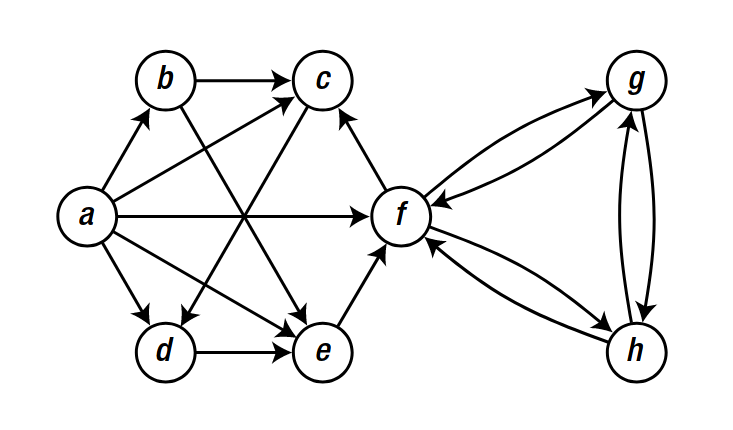

In [3]:
a, b, c, d, e, f, g, h = range(8)

N = {a: {b, c, d, e, f},
     b: {e, c},
     c: {d},
     d: {e},
     e: {f},
     f: {c, g, h},
     g: {f, h},
     h: {f, g},
    }

In [4]:
b in N[a] # membership test

True

In [5]:
len(N[a]) # degree

5

## Exercise 1

If we want to include edge weights, you can either store the weights in additional weight matrices, or more easily by using a dictionary instead of a set to represent the edges.
Recreate this graph:

![graph 2](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FtMaUp.png&f=1&nofb=1&ipt=db740833a6ba0b1e197a3c90294c55c181cd2c288f20bef719fb728715764a37&ipo=imageshttps://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FtMaUp.png&f=1&nofb=1&ipt=db740833a6ba0b1e197a3c90294c55c181cd2c288f20bef719fb728715764a37&ipo=images)

In [11]:
a, b, c, d, e = range(5)

N = {
    a: {b: 3,c: 6,d: 6,e: 1},
    b: {a: 3, c: 2, e: 4, d:5},
    c: {a: 6, b: 2, e: 5, d:6},
    e: {a:1, b:4, c: 5, d: 4},
    d: {a:6, b:5, c: 6, e:4}

}
print(N)

{0: {1: 3, 2: 6, 3: 6, 4: 1}, 1: {0: 3, 2: 2, 4: 4, 3: 5}, 2: {0: 6, 1: 2, 4: 5, 3: 6}, 4: {0: 1, 1: 4, 2: 5, 3: 4}, 3: {0: 6, 1: 5, 2: 6, 4: 4}}


In [12]:
assert all(N[node_i][node_j] == N[node_j][node_i] for node_i in N for node_j in N[node_i])

# Molecule as Graphs

Let's try to represent Phenol as a Graph. To store chemical information we will this time create a Tuple containing the element, number of bonds and an unique id.

In [13]:
class Atom(NamedTuple):
    name: str
    bonds: int
    id: int
    
    def __repr__(self):
        return f'{color.BOLD}{self.name}{color.END}_{color.WHITE}{self.id}{color.END}'

In [14]:
c1, c2, c3, c4, c5, c6 = (Atom('C', 4, i) for i in range(1, 7))
o = Atom('O', 2, 7)

phenol = {c1: {c6: 1.5, c2: 1.5},
          c2: {c1: 1.5, c3: 1.5},
          c3: {c2: 1.5, c4: 1.5},
          c4: {c3: 1.5, c5: 1.5},
          c5: {c4: 1.5, c6: 1.5},
          c6: {c5: 1.5, c1: 1.5, o:1},
          o: {c6: 1},
         }

In [15]:
print(f'Number of Bonds to Hydrogen at:')
print('c1:', c1.bonds - sum(phenol[c1].values()))
print('c6:', c6.bonds - sum(phenol[c6].values()))
print('o:', o.bonds - sum(phenol[o].values()))

Number of Bonds to Hydrogen at:
c1: 1.0
c6: 0.0
o: 1


## Exercise 2

represent cyclopropanol as a graph. Once again you can ommit the hydrogens.


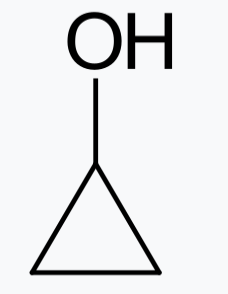

In [28]:


c1, c2, c3 = (Atom('C', 4, i) for i in range(1, 4))
o = Atom('O', 2, 4)


cyclopropanol = {
                c1: {c2: 1, c3: 1, o: 1},
                c2: {c1: 1, c3: 1},
                c3: {c1: 1, c3: 1},
                o:{c1: 1}
}


print(cyclopropanol[c2].values())

dict_values([1, 1])


In [29]:
assert len(cyclopropanol) == 4
assert sum(cyclopropanol[c2].values()) == 4

AssertionError: 

# Calculating Descriptors from Graphs

For more Information, take a look at the lecture slides 2.

## Exercise 3: Branching Index

\begin{equation}
B = \sum_{bonds} \frac{1}{\sqrt{\delta_i \delta_j}}
\end{equation}

where:
- $\delta$ number of adjacent non-H atoms


In [ ]:
# this is a generic typ
T = TypeVar('T')
# this is a type alias
Graph = dict[T, dict[T, float]]

In [ ]:
def branching_index(graph: Graph) -> float:
    """Calculate the branching index of a graph.
    
    :params graph: Contains a graph representation of a molecule
    :type graph: dict[int, dict[int, int]]
    
    :returns: the branching index B
    :rtype: float
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return B

In [ ]:
assert math.isclose(branching_index(cyclopropanol), 
                    1/2 + 2/math.sqrt(2*3) + 1/math.sqrt(3))
assert math.isclose(branching_index(phenol), 
                    4/2 + 2/math.sqrt(2*3) + 1/math.sqrt(3))

## Exercise 4: Wiener Index

\begin{align}
    W &= \frac{1}{2} \sum^N_{i=1}\sum^N_{j=1} D_{ij}
\end{align}

where:
- D: number of bonds between atom i and j, in the context of a graph: the shortest distance between vertix i and j

### a) calculating the distances
Start by implementing a function `distance` that calculates the shortest distance of a graph starting at vertix i and ending at vertix j.

In [ ]:
def distance(graph: Graph, i: int, j: int) -> int:
    """Calculate the shortest distance between two points on a graph.
    
    :params graph: Contains a graph representation of a molecule
    :type graph: dict[int, dict[int, int]]
    
    :params i: index of starting point
    :type i: int
    
    :params j: index of end point
    :type j: int
    
    :returns: Distance between the two points on the graph
    :rtype: int
    
    :raises KeyError: If i or j are not keys of the graph
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return dist

In [ ]:
c1, c2, c3, c4, c5, c6, oxygen = phenol.keys()

assert distance(phenol, c1, oxygen) == 2
assert distance(phenol, oxygen, c1) == 2
assert distance(phenol, c4, c4) == 0
assert distance(phenol, c2, c5) == distance(phenol, c6, c3)

### b) Descriptor value
The implementation of the Wiener Index now should be straight forward.

\begin{align}
    W &= \frac{1}{2} \sum^N_{i=1}\sum^N_{j=1} D_{ij}
\end{align}

In [ ]:
def wiener_index(graph: Graph) -> int:
    """Calculate the wiener index of a graph.
    
    :params graph: Contains a graph representation of a molecule
    :type graph: dict[int, dict[int, int]]
    
    :returns: the wiener index W
    :rtype: int
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return W

In [ ]:
assert wiener_index(cyclopropanol) == (4 + 4 + 3 + 5) / 2
assert wiener_index(phenol) == 42

# Converting Smiles to Graphs
## Exercise 4

Write a function that converts a smile to a graph representation. 
This time, instead of using the Tuple, we will just assign an unique id to every atom and have a second dictionary storing the element name for each id.

Your function should be able to handle:
- single, double and tripple bonds
- rings

In [ ]:
# again type alias
AtomIds = dict[T, str]

In [ ]:
def smiles_to_graph(smile: str) -> tuple[Graph, AtomIds]:
    """Convert a SMILES string into a graph representation.
    
    :params smile: input smile string
    :type smile: string
    
    :returns: a tuple containing two dictionaries. The first dictionary contains the graph with the atom ids as keys, 
              and a dictionary that maps the connected atom ids to the bond strength inbetween as values.
              The second dictinoary maps the atom id to element name.
    :rtype: tuple containing a dict[int, dict[int, int]] and dict[int, str]
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return graph, atoms

In [ ]:
graph, atoms = smiles_to_graph('CCO')

assert atoms[0] == 'C'
assert len(graph[1]) == 2
assert 0 in graph[1]

In [ ]:
graph, atoms = smiles_to_graph('C1C(=O)C1')

assert atoms[1] == 'C'
assert len(graph[1]) == 3
assert graph[1][2] == 2
assert 3 in graph[0]

In [ ]:
butan, _ = smiles_to_graph('CCCC')
isobutan, _ = smiles_to_graph('CC(C)C')

assert math.isclose(branching_index(butan), 1.914, abs_tol=0.001)
assert math.isclose(branching_index(isobutan), 1.732, abs_tol=0.001)

assert distance(butan, 0, 3) == 3
assert distance(isobutan, 2, 3) == 2

assert wiener_index(butan) == 10
assert wiener_index(isobutan) == 9